In [1]:
"""Декораторы."""

'Декораторы.'

## Декораторы.
- Декораторы (decorators) в Питоне позволяют изменять и расширять возможности функций и методов без изменения их исходного кода. Начнем с нескольких предварительных замечаний.
### Объекты первого класса
- Функции в Питоне представляют собой объекты первого класса (first class objects), что означает, что их можно присваивать переменной, возвращать из функции или передавать другой функции в качестве аргумента.
### Присвоение функции переменной.
- Посмотрим, как присвоить функцию переменной.

In [2]:
# объявим функцию
from typing import Callable


def say_hello(name: str) -> None:
    """Напечатайте приветствие с указанным именем."""
    print(f"Привет, {name}!")


# присвоим эту функцию переменной (без скобок)
say_hello_function = say_hello
# вызовем функцию из новой переменной
say_hello_function("Алексей")

Привет, Алексей!


### Передача функции в качестве аргумента.
- Теперь передадим функцию в качестве аргумента другой функции. Создадим калькулятор, который на вход будет принимать функцию-операцию, а также компоненты математических выражений.

In [7]:
def simple_calculator(
    operation: Callable[[float, float], float], a_1: float, b_1: float
) -> float:
    """Выполняет операцию над двумя числами."""
    return operation(a_1, b_1)


def add(a_2: float, b_2: float) -> float:
    """Складывает два числа."""
    return a_2 + b_2


def subtract(a_3: float, b_3: float) -> float:
    """Вычитает второе число из первого."""
    return a_3 - b_3


def multiply(a_4: float, b_4: float) -> float:
    """Умножает два числа."""
    return a_4 * b_4


def divide(a_5: float, b_5: float) -> float:
    """Делит первое число на второе."""
    if b_5 == 0:
        raise ValueError("Деление на ноль")
    return a_5 / b_5

In [8]:
# Разделим единицу на три.
simple_calculator(divide, 1, 3)

0.3333333333333333

## Внутрение функции.
- Внутренние (inner) или вложенные (nested) функции представляют собой функции, объявленные и вызванные внутри других функций.
### Вызов внутренней функции.
- Объявим внешнюю и внутреннюю функции.

In [9]:
def outer() -> None:
    """Вызывает внутреннюю функцию."""
    print("Вызов внешней функции.")

    def inner() -> None:
        """Выводит сообщение о вызове."""
        print("Вызов внутренней функции.")

    inner()

- Вызовем внешнюю функцию.

In [10]:
outer()

Вызов внешней функции.
Вызов внутренней функции.


- Вызвать внутреннюю функцию не получится.

In [11]:
# inner()

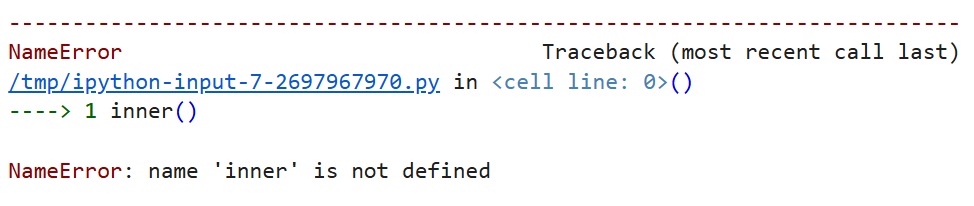

## Возвращение функции из функции.
- Функция может возвращать другую функцию. В примере ниже функция create_multiplier() создает множитель (factor) для передаваемого во внуреннюю функцию multiplier() числа (number).

In [ ]:
def create_multiplier(factor: float) -> Callable[[float], float]:
    """Создает функцию умножения на заданный множитель."""

    def multiplier(number: float) -> float:
        """Умножает число на множитель."""
        return number * factor

    return multiplier

- Создадим две ссылки на внутреннюю функцию multiplier(), передав ей в качестве параметра множитель, равный соответственно двум и трем.

In [28]:
double: Callable[[float], float] = create_multiplier(factor=2)
triple: Callable[[float], float] = create_multiplier(factor=3)

In [29]:
print(double)

<function create_multiplier.<locals>.<lambda> at 0x00000137B7AC49A0>


- Умножим число два на каждый из множителей.

In [37]:
# double(number=2), triple(number=2)
print(double(2))
print(triple(2))

4
6


- Заметим, что код в примере выше можно сократить с помощью lambda-функции.

In [42]:
# def create_multiplier(factor: float) -> Callable[[float], float]:
#     """Создает функцию умножения на множитель."""
#     return lambda number: factor * number

In [43]:
# triple: Callable[[float], float] = create_multiplier(factor=3)
# print(triple(number=2))

 ## Замыкание.
- В примере выше внутренняя функция multiplier() может получить доступ к переменной factor внешней функции create_multiplier() даже после того, как внешняя функция уже выполнена.
- В этом случае говорят о замыкании (closure) внутренней функции внешней или охватываемой (enclosed) функции.
## Знакомство с декораторами.
### Простой декоратор.
- Соберем показанные выше приемы в общую конструкцию. Объявим обычные (внешние) функции simple_decorator() и say_hello(), а также внутреннюю функцию-замыкание wrapper(), которая будет выводить текст до и после вызова функции func(), передаваемой в качестве аргумента.

In [44]:
# def simple_decorator(func):
#   def wrapper():
#     print('Текст до вызова функции func().')
#     func()
#     print('Текст после вызова функции func().')
#   return wrapper
#
# def say_hello():
#   print('Привет!')

- Передадим say_hello() в качестве аргумента в функцию simple_decorator() и поместим ссылку на этот объект в переменную с именем say_hello.

In [45]:
# say_hello = simple_decorator(say_hello)

- Вызовем функцию say_hello().

In [46]:
# say_hello()

- Таким образом, декоратор — это функция, которая принимает в качестве аргумента другую функцию и возвращает ее дополненную версию.
### Конструкция @decorator.
- Такого же результата можно достичь благодаря использованию так называемого синтаксического сахара (syntactic sugar) или, говоря иначе, шаблона, упрощающего примение декоратора.
- В частности, вызовем декоратор с использованием символа @ непосредственно перед объявлением декорируемой функции.

In [47]:
# @simple_decorator
# def say_hi():
#   print('Снова, привет!')

- Вызовем расширенную декоратором функцию.

In [48]:
# say_hi()

### Функции с аргументами.
- Рассмотрим функцию с аргументом и применим к ней simple_decorator().

In [49]:
# @simple_decorator
# def say_hello_with_name(name):
#   print(f'Привет, {name}!')

- При попытке вызова декорируемой функции произойдет ошибка, поскольку внутренняя функция wrapper() не принимает аргументов.

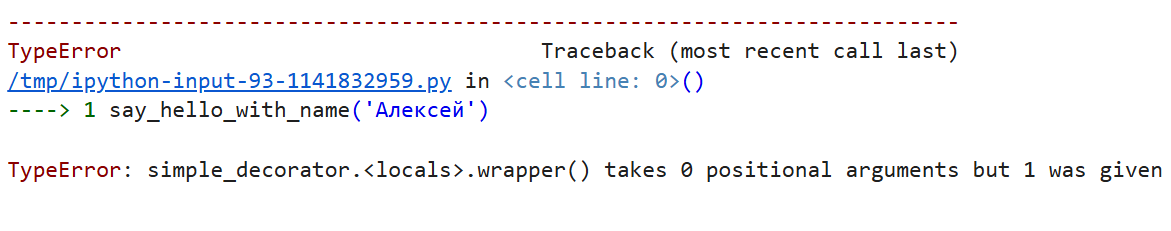

- Исправим это.

In [50]:
# def decorator_with_name_argument(func):
#   def wrapper(name):
#     print('Текст до вызова функции func().')
#     func(name)
#     print('Текст после вызова функции func().')
#   return wrapper
# @decorator_with_name_argument
# def say_hello_with_name(name):
#   print(f'Привет, {name}!')
# say_hello_with_name('Алексей')

- Мы также можем передать во внутреннюю функцию произвольное количество позиционных (*args) и именованных (**kwargs) аргументов.

In [51]:
# def decorator_with_arguments(func):
#   def wrapper(*args, **kwargs):
#     print('Текст до вызова функции func().')
#     func(*args, **kwargs)
#     print('Текст после вызова функции func().')
#   return wrapper
# @decorator_with_arguments
# def say_hello_with_argument(name):
#   print(f'Привет, {name}!')
# say_hello_with_argument('Алексей')

## Возвращение значения декорируемой функции.
- Объявим функцию return_name() и декорируем ее с помощью another_decorator().

In [52]:
# def another_decorator(func):
#   def wrapper(*args, **kwargs):
#     print('Текст внутренней функции.')
#     func(*args, **kwargs)
#   return wrapper
# @decorator_with_arguments
# def return_name(name):
#   return name

- Посмотрим, какое значение вернула эта функция.

In [53]:
# returned_value = return_name('Алексей')
# Текст внутренней функции.
# print(returned_value)
# None

- Функция return_name() вернула None, потому что внутренняя функция декоратора не возвращает никакого значения. Исправим это.

In [54]:
# def another_decorator(func):
#   def wrapper(*args, **kwargs):
#     print('Текст внутренней функции.')
#     return func(*args, **kwargs) # внутренняя функция возвращает func()
#   return wrapper
# @decorator_with_arguments
# def return_name(name):
#   return name
# returned_value = return_name('Алексей')
# Текст внутренней функции.
# print(returned_value)
# Алексей

### Декоратор @functools.wraps
- Питон содержит инстументы для интроспекции (introspection), которые позволяют исследовать уже созданный объект. В частности,
    - функция type() возвращает тип объекта;
    - dir() выводит список атрибутов и методов объекта;
    - id() возвращает уникальный идентификатор.
- Кроме этого, в частности, для функции мы можем вывести ее имя с помощью атрибута __name__ и, при наличии, документацию через атрибут __doc__.

In [55]:
# def square(x):
#   """Squares a number"""
#   return x * x
# square.__name__, square.__doc__
# ('square', 'Squares a number')

- При использовании декоратора мы по сути заменяем исходную декорируемую функцию на внутреннюю замыкающую функцию.

In [56]:
# def repeat_twice(func):
#   def wrapper(*args, **kwargs):
#     func(*args, **kwargs)
#     func(*args, **kwargs)
#   return wrapper
# @repeat_twice
# def square(x):#
#   """Squares a number"""
#   return x * x
# square(3)

- Как следствие, инструменты интроспекции не видят декорируемой функции.

In [57]:
# square.__name__, square.__doc__

- Декоратор @functools.wraps модуля functools позволяет сохранить метаданные декорируемого объекта.

In [58]:
# import functools
#
# def repeat_twice(func):
#   @functools.wraps(func)
#   def wrapper(*args, **kwargs):
#     func(*args, **kwargs)
#     func(*args, **kwargs)
#   return wrapper
# @repeat_twice
# def square(x):
#   """Squares a number"""
#   print(x * x)
# square.__name__, square.__doc__

- Атрибут __wrapped__ ссылается на исходную функцию до применения декоратора.

In [59]:
# square.__wrapped__

- Можно также воспользоваться функцией functools.update_wrapper().

In [60]:
# def repeat_twice(func):
#   def wrapper(*args, **kwargs):
#     func(*args, **kwargs)
#     func(*args, **kwargs)
#   functools.update_wrapper(wrapper, func)
#   return wrapper
# @repeat_twice
# def power(x,n):
#   """Raises to a power"""
#   print(x ** n)
# power(2,3)
# power.__doc__

### Примеры декораторов.
- Декоратор можно использовать для выведения (и записи) информации о вызове функции (логирования).



In [61]:
# def logging(func):
#   def wrapper(*args, **kwargs):
#     print(f'Calling {func.__name__} with args: {args}, kwargs: {kwargs}')
#     result = func(*args, **kwargs)
#     print(f'{func.__name__} returned: {result}')
#     return result
#   return wrapper
# @logging
# def power(x,n):
#   return x**n
# power(5, 3)

- Кроме этого, декораторы помогут измерить время выполнения функции.

In [62]:
# import time
#
# def timer(func):
#   def wrapper(*args, **kwargs):
#     start_time = time.time()
#     result = func(*args, **kwargs)
#     end_time = time.time()
#     print(f"{func.__name__} executed in {end_time - start_time:.4f} seconds")
#     return result
#   return wrapper
# @timer
# def delayed_function(t):
#   time.sleep(t)
#   return 'execution completed'
#
# delayed_function(2)#

### Типы методов.
- Теперь, когда мы познакомились с декораторами, рассмотрим три типа методов в Питоне.
- С методами экземпляра (instance method) мы уже знакомы. Они работают с экземпляром класса и первым аргументом принимают переменную self, ссылающуюся на этот экземляр.
- Создадим класс CatClass с двумя атрибутами экземпляра и одним методом экземпляра для вывода этих атрибутов.

In [63]:
# class CatClass:
#
#   def __init__(self, color):
#     self.color = color
#     self.type_ = 'cat'
#
#   def info(self):
#     print(self.color, self.type_, sep=', ')
# cat = CatClass(color='black')
# cat.info()

- При этом поскольку это атрибуты и методы экземляра класса, применить их к самому классу мы не можем.

In [64]:
# CatClass.info()

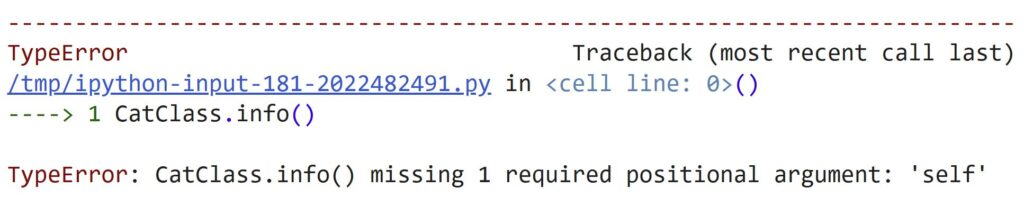

- Переменные класса (class variable) и методы класса (class method) позволяют обратиться к самому классу без создания экземпляра.
- Для создания метода класса используется декоратор @classmethod. Первым аргументом является переменная cls, ссылающаяся на сам класс.

In [65]:
# class CatClass:
#
#   species = 'кошка' # переменная класса доступна всем экземлярам
#
#   def __init__(self, color):
#     self.color = color
#
#   def info(self):
#     print(self.color)
#
#   @classmethod
#   def get_species(cls):
#     print(cls.species)
#     # нет доступа к переменным color и type_
# CatClass.species
# 'кошка'
# CatClass.get_species()
# кошка

- Статические методы (static methods) объявляются с помощью декоратора @staticmethod, не принимают аргументов, ссылающихся на экземляр (self) или класс (cls), и, как следствие, не имеют доступа к переменным и методам экземпляра или класса.
- Чаще всего статические методы — это служебные методы, логически связанные с функционалом создаваемого класса. В нашем примере создадим статический метод для преобразования веса кошки из килограммов в фунты.

In [66]:
# class CatClass:
#
#   species = 'кошка'
#
#   def __init__(self, color):
#     self.color = color
#     self.type_ = 'cat'
#
#   def info(self):
#     print(self.color, self.type_)
#
#   @classmethod
#   def get_species(cls):
#     print(cls.species)
#     # нет доступа к переменным color и type_
#
#   @staticmethod
#   def convert_to_pounds(x):
#     print(f'{x} kg is approximately {x * 2.205} pounds')
#     # нет доступа к переменным species, color и type_

- Статические методы можно вызвать как из самого класса, так и из экземпляра класса.

In [67]:
# CatClass.convert_to_pounds(4)

In [68]:
# cat = CatClass('gray')
# cat.convert_to_pounds(5)

## Декорирование класса
- Помимо встроенных декораторов @classmethod и @staticmethod мы можем расширять функционал класса с помощью собственных декораторов. Применим декоратор @timer к классу CatClass.

In [69]:
# @timer
# class CatClass:
#
#   def __init__(self, color):
#     self.color = color
#     self.type_ = 'cat'
#
#   def info(self):
#     time.sleep(2)
#     print(self.color, self.type_, sep=', ')
# cat = CatClass('gray')

In [70]:
# cat.info()

- Как мы видим, декоратор «сработал» только при создании экземпляра класса.
- Теперь рассмотрим функцию setattr(), которая позволяет добавить к экземпляру класса атрибут и соответствующее значение атрибута.

In [71]:
# setattr(cat, 'weight', 5)

- Получить значение атрибута можно, обратившись к атрибуту напрямую или через функцию getattr().

In [72]:
# cat.weight, getattr(cat, 'weight')

- Функцию setattr() можно использовать в декораторе и, таким образом, добавить переменную класса.

In [73]:
# def add_attribute(attribute_name, attribute_value):
#   def wrapper(cls):
#     setattr(cls, attribute_name, attribute_value)
#     return cls
#   return wrapper
# @add_attribute('species', 'кошка')
# class CatClass:
#
#   def __init__(self, color):
#     self.color = color
#     self.type_ = 'cat'
# CatClass.species

### Несколько декораторов.
- Ничто не мешает использовать несколько декораторов.

In [74]:
# @logging
# @timer
# def delayed_function(t):
#   time.sleep(t)
#   return 'execution completed'
# delayed_function(2)

- Вместо синтаксического сахара можно записать функцию в переменную, последовательно применив сначала один декоратор, а затем второй.

In [75]:
# не забудем заново объявить функцию без декораторов
# def delayed_function(t):
#   time.sleep(t)
#   return 'execution completed'
# delayed_function = logging(timer(delayed_function))
# delayed_function(2)
# Calling wrapper with args: (2,), kwargs: {}
# delayed_function executed in 2.0002 seconds
# wrapper returned: execution completed
# 'execution completed'

- Несложно увидеть, почему такую конструкцию также называют вложенными декораторами (nested decorators).
## Декораторы с аргументами
- Иногда бывает полезно передать декоратору некоторый аргумент. Например, модифицируем декоратор @repeat_twice таким образом, чтобы он вызывал декорируемую функцию заданное параметром количество раз.

In [76]:
# def repeat(n_times):
#   def inner_decorator(func):
#     @functools.wraps(func)
#     def wrapper(*args, **kwargs):
#       for _ in range(n_times):
#         func(*args, **kwargs)
#     return wrapper
#   return inner_decorator
# @repeat(n_times=3)
# def say_hello(name):
#   print(f'Привет, {name}!')
# say_hello('Алексей')

- С точки зрения синтаксиса мы помещаем исходный декоратор inner_decorator() во внешнюю функцию repeat() и, таким образом, создаем два уровня вложенности.
- Благодаря замыканию inner_decorator() получает доступ к значению параметра n_times, а wrapper() соответственно к n_times и func.